## 範例重點

學習在模型開始前檢查各個環節

是否有 GPU 資源

將前處理轉為函式，統一處理訓練、驗證與測試集

將超參數變數化，易於重複使用函式、模型等

In [1]:
## 確認硬體資源 (如果你是在 Linux, 若是在 Windows, 請參考 https://blog.csdn.net/idwtwt/article/details/78017565)
!nvidia-smi

/bin/sh: nvidia-smi: command not found


https://github.com/phvu/cuda-smi

On Windows/Linux, there is a program called nvidia-smi for checking the memory and general statistics of GPUs.

There is no such thing on MacOS.

This program tries to bring that ability to MacOS. The main functionality is to display memory usage of each GPU.

In [3]:
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [4]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [5]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [6]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [7]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [8]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

W0720 15:18:43.981170 4811568576 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0720 15:18:44.038464 4811568576 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0720 15:18:44.066436 4811568576 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [9]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [10]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0720 15:19:01.228672 4811568576 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0720 15:19:01.237677 4811568576 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [11]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0720 15:19:09.794455 4811568576 deprecation.py:323] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0720 15:19:09.871388 4811568576 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 20s 408us/step - loss: 1.9290 - acc: 0.3084 - val_loss: 1.7732 - val_acc: 0.3664
Epoch 2/100
50000/50000 [==============================] - 8s 167us/step - loss: 1.7048 - acc: 0.3907 - val_loss: 1.6689 - val_acc: 0.4081
Epoch 3/100
50000/50000 [==============================] - 8s 165us/step - loss: 1.6260 - acc: 0.4216 - val_loss: 1.6155 - val_acc: 0.4306
Epoch 4/100
50000/50000 [==============================] - 8s 158us/step - loss: 1.5552 - acc: 0.4465 - val_loss: 1.5908 - val_acc: 0.4370
Epoch 5/100
50000/50000 [==============================] - 8s 160us/step - loss: 1.5051 - acc: 0.4644 - val_loss: 1.4793 - val_acc: 0.4719
Epoch 6/100
50000/50000 [==============================] - 8s 161us/step - loss: 1.4637 - acc: 0.4777 - val_loss: 1.5335 - val_acc: 0.4606
Epoch 7/100
50000/50000 [==============================] - 13s 260us/step - loss: 1.4319 - acc: 0.4899 - val_loss: 

Epoch 59/100
50000/50000 [==============================] - 11s 216us/step - loss: 0.5303 - acc: 0.8099 - val_loss: 2.0751 - val_acc: 0.5071
Epoch 60/100
50000/50000 [==============================] - 10s 206us/step - loss: 0.5378 - acc: 0.8086 - val_loss: 2.0600 - val_acc: 0.5128
Epoch 61/100
50000/50000 [==============================] - 10s 204us/step - loss: 0.5168 - acc: 0.8130 - val_loss: 2.0921 - val_acc: 0.5047
Epoch 62/100
50000/50000 [==============================] - 10s 209us/step - loss: 0.4906 - acc: 0.8260 - val_loss: 2.1429 - val_acc: 0.5080
Epoch 63/100
50000/50000 [==============================] - 10s 190us/step - loss: 0.4891 - acc: 0.8267 - val_loss: 2.1231 - val_acc: 0.5045
Epoch 64/100
50000/50000 [==============================] - 12s 233us/step - loss: 0.5048 - acc: 0.8197 - val_loss: 2.0835 - val_acc: 0.5138
Epoch 65/100
50000/50000 [==============================] - 19s 373us/step - loss: 0.4765 - acc: 0.8305 - val_loss: 2.1794 - val_acc: 0.5043
Epoch 66/100


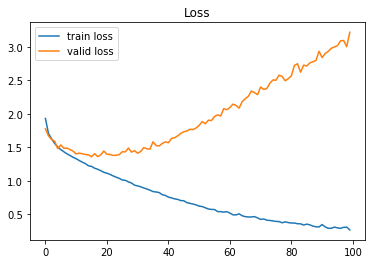

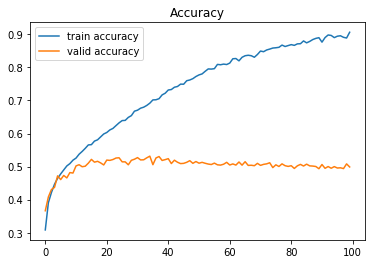

In [13]:
# 訓練模型並檢視驗證集的結果
import matplotlib.pyplot as plt

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## 作業

1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練


2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢


3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
"""
Your code here (optional)
確認硬體資源
"""
## 確認硬體資源 (如果你是在 Linux, 若是在 Windows, 請參考 https://blog.csdn.net/idwtwt/article/details/78017565)
# !nvidia-smi

'\nYour code here (optional)\n確認硬體資源\n'

In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ
# 3. 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

With: $ 𝑥′ = (𝑥 − min 𝑥) / (max 𝑥 − min 𝑥 ) $ you normalize your feature 𝑥 in [0,1].

To normalize in [−1,1] you can use:

$ 𝑥″ = 2 * [(𝑥 − min 𝑥) / (max 𝑥 − min 𝑥)] −1 $

In [4]:
## 資料前處理
"""
Your code here
"""
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255. # standardize
#     x = (2 * (x-min(x)) / (max(x) - min(x))) - 1 # normalize to [-1, 1]
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y  

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
# from sklearn import preprocessing
# max_abs_scaler = preprocessing.MaxAbsScaler()

# x_train = max_abs_scaler.fit_transform(x_train)
# x_test = max_abs_scaler.transform(x_test)

In [7]:
display(x_test.min())
display(x_test.max())

0.0

1.0

In [9]:
"""Code Here
建立你的神經網路
"""
                                       # 透過增加 num_neurons 的數量，來把層數加得更深
                                       # 2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32, 16]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

W0720 16:32:11.369549 4452021696 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0720 16:32:11.445226 4452021696 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0720 16:32:11.470918 4452021696 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
hidden_layer6 (Dense)        (None, 16)                528       
__________

In [10]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [11]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0720 16:32:38.124404 4452021696 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0720 16:32:38.148645 4452021696 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [12]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0720 16:32:47.083976 4452021696 deprecation.py:323] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0720 16:32:47.182736 4452021696 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 23s 462us/step - loss: 2.1461 - acc: 0.1852 - val_loss: 2.0325 - val_acc: 0.2468
Epoch 2/100
50000/50000 [==============================] - 12s 230us/step - loss: 1.8984 - acc: 0.2959 - val_loss: 1.7929 - val_acc: 0.3485
Epoch 3/100
50000/50000 [==============================] - 10s 206us/step - loss: 1.7611 - acc: 0.3637 - val_loss: 1.7207 - val_acc: 0.3760
Epoch 4/100
50000/50000 [==============================] - 25s 497us/step - loss: 1.6648 - acc: 0.3986 - val_loss: 1.6251 - val_acc: 0.4132
Epoch 5/100
50000/50000 [==============================] - 26s 519us/step - loss: 1.6035 - acc: 0.4227 - val_loss: 1.6049 - val_acc: 0.4224
Epoch 6/100
50000/50000 [==============================] - 14s 280us/step - loss: 1.5572 - acc: 0.4399 - val_loss: 1.5868 - val_acc: 0.4224
Epoch 7/100
50000/50000 [==============================] - 9s 175us/step - loss: 1.5271 - acc: 0.4510 - val_lo

/Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.820130). Check your callbacks.
  % delta_t_median)
/Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.411170). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 9s 175us/step - loss: 0.6803 - acc: 0.7527 - val_loss: 1.8919 - val_acc: 0.4963
Epoch 56/100
50000/50000 [==============================] - 8s 157us/step - loss: 0.6687 - acc: 0.7565 - val_loss: 1.8988 - val_acc: 0.5074
Epoch 57/100
50000/50000 [==============================] - 8s 157us/step - loss: 0.6661 - acc: 0.7557 - val_loss: 1.8765 - val_acc: 0.4986
Epoch 58/100
50000/50000 [==============================] - 9s 186us/step - loss: 0.6462 - acc: 0.7661 - val_loss: 1.9456 - val_acc: 0.5075
Epoch 59/100
50000/50000 [==============================] - 8s 161us/step - loss: 0.6311 - acc: 0.7697 - val_loss: 1.9868 - val_acc: 0.4957
Epoch 60/100
50000/50000 [==============================] - 8s 162us/step - loss: 0.6386 - acc: 0.7671 - val_loss: 2.0239 - val_acc: 0.5009
Epoch 61/100
50000/50000 [==============================] - 8s 154us/step - loss: 0.6134 - acc: 0.7772 - val_loss: 1.9949 - val_acc: 0.5046
Epoch 62/100
50000/50000 [=======

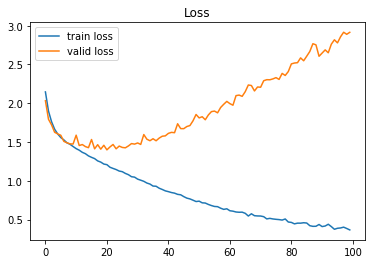

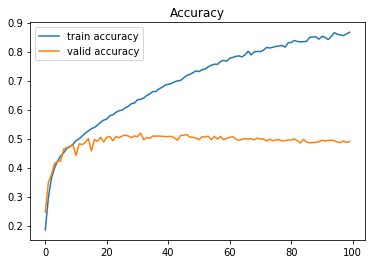

In [14]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()